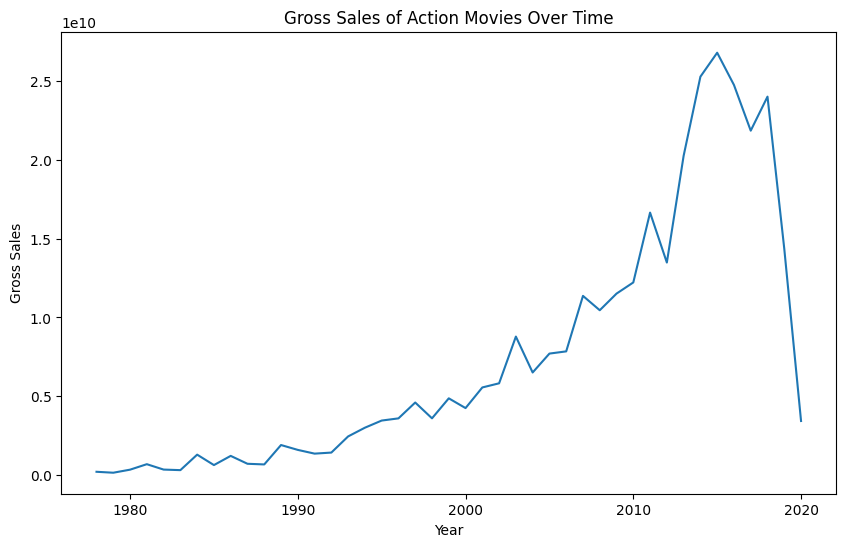

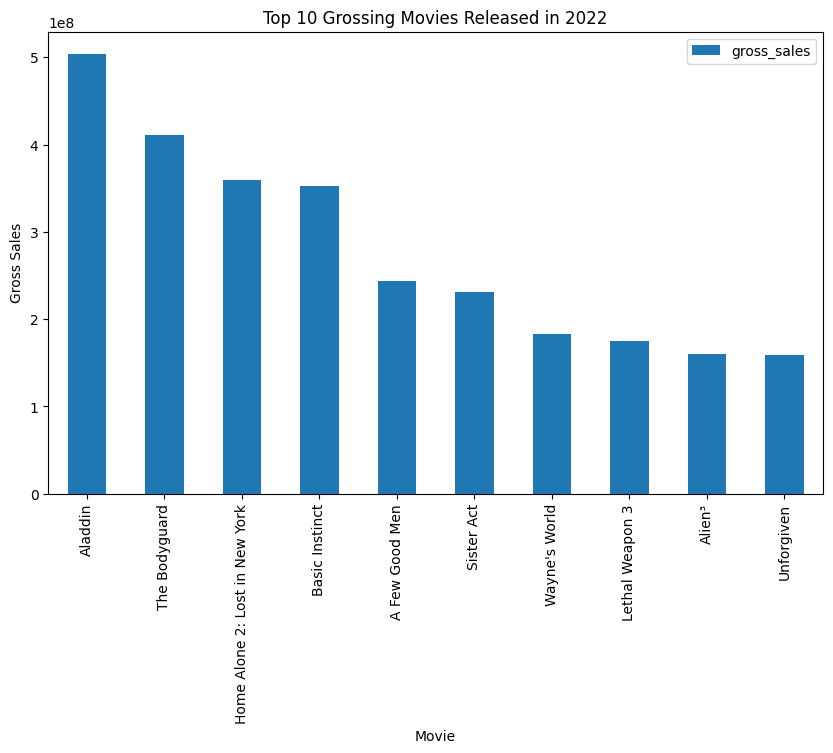

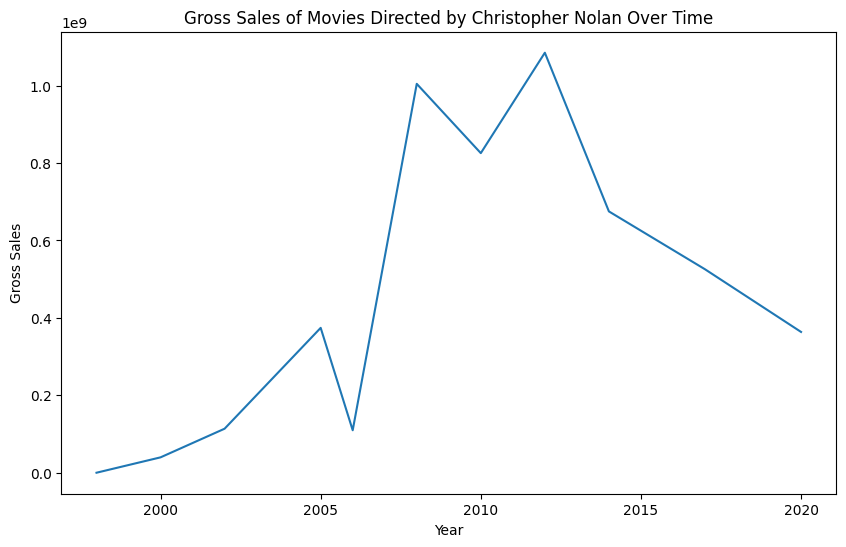

In [45]:
# Importing necessary libraries
import json
import pandas as pd
import matplotlib.pyplot as plt
from pymongo import MongoClient

# Ensure data is a dictionary
assert isinstance(data, dict), "data should be a dictionary."

# Connect to MongoDB
client = MongoClient(data['mongodb'])

# Access your DB and collection
db = client['Mydatabase']  
collection = db['1'] 

# Define the aggregation pipeline
pipeline = [
    {
        "$addFields": {
            "runtime": { 
                "$convert": { 
                    "input": "$runtime", 
                    "to": "int", 
                    "onError": 0 
                } 
            },
            "user_rating": { 
                "$convert": { 
                    "input": "$user_rating", 
                    "to": "double", 
                    "onError": 0.0 
                } 
            },
            "votes": { 
                "$convert": { 
                    "input": "$votes", 
                    "to": "int", 
                    "onError": 0 
                } 
            },
            "budget": { 
                "$convert": { 
                    "input": "$budget", 
                    "to": "int", 
                    "onError": 0 
                } 
            },
            "opening_weekend": { 
                "$convert": { 
                    "input": "$opening_weekend", 
                    "to": "int", 
                    "onError": 0 
                } 
            },
            "gross_sales": { 
                "$convert": { 
                    "input": "$gross_sales", 
                    "to": "int", 
                    "onError": 0 
                } 
            },
            "genres": { "$split": [{ "$toString": "$genres" }, ", "] },
            "cast": { "$split": [{ "$toString": "$cast" }, ", "] },
            "director": { "$split": [{ "$toString": "$director" }, ", "] },
            "producer": { "$split": [{ "$toString": "$producer" }, ", "] },
            "company": { "$split": [{ "$toString": "$company" }, ", "] },
            "release_date": {
                "$dateFromString": {
                    "dateString": "$release_date",
                    "format": "%m/%d/%Y"
                }
            },
            "mpaa_rating": { 
                "$arrayElemAt": [ { "$split": [ "$mpaa_rating", "::" ] }, 0 ] 
            }
        }
    }
]


# Execute the aggregation pipeline
result = collection.aggregate(pipeline)

# To print the result
#for document in result:
#    print(document)

cursor = collection.aggregate(pipeline)
df = pd.DataFrame(list(cursor))

# Select a single genre of movies over time.
#genre_df = df[df['genres'].apply(lambda x: 'Action' in x)]
# Plot gross_sa
#genre_df.groupby(genre_df['release_date'].dt.year)['gross_sales'].sum().plot()
#plt.xlabel('Year')
#plt.ylabel('Gross Sales')
#plt.title('Gross Sales of Action Movies Over Time')
#plt.show()

# Select action movies
genre_df = df[df['genres'].apply(lambda x: 'Action' in x)]

# Sum up the gross sales by year
genre_sales_by_year = genre_df.groupby(genre_df['release_date'].dt.year)['gross_sales'].sum()

# Plot the gross sales over time
genre_sales_by_year.plot.line(figsize=(10,6))
plt.title('Gross Sales of Action Movies Over Time')
plt.xlabel('Year')
plt.ylabel('Gross Sales')
plt.show()


# Select movies released in 1992
year_df = df[df['release_date'].dt.year == 1992]
# Sort by gross_sales and take the top 10
top_movies = year_df.sort_values('gross_sales', ascending=False).head(10)

top_movies.plot.bar(x='title', y='gross_sales', figsize=(10,6))
plt.title('Top 10 Grossing Movies Released in 1992')
plt.xlabel('Movie')
plt.ylabel('Gross Sales')
plt.show()

# Select movies directed by Christopher Nolan
director_df = df[df['director'].apply(lambda x: 'Christopher Nolan' in x)]
# Sum up the gross sales by year
director_sales_by_year = director_df.groupby(director_df['release_date'].dt.year)['gross_sales'].sum()
# Plot the gross sales over time
director_sales_by_year.plot.line(figsize=(10,6))
plt.title('Gross Sales of Movies Directed by Christopher Nolan Over Time')
plt.xlabel('Year')
plt.ylabel('Gross Sales')
plt.show()

